In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [81]:
def parse_string(s):
    s = s.replace("\r", " ")
    s = ' '.join(s.split())
    return s

def load_single_df(file):
    raw_data = pd.read_excel(file)

    data = raw_data.truncate(before=5)
    data.columns = raw_data.iloc[4]
    data = data.dropna(subset = ['Assuntos'])
    data = data[data['Andamento'] != 'Não conhecido(s)']
    data = data.loc[:, data.columns.notnull()]
    data = data[data['Assuntos'].str.contains('direito tributário',case=False)]
    data = data.reset_index()
    data = data.drop(columns=['index'])
    data['Assuntos'] = data['Assuntos'].apply(parse_string)
  
    return data
    
def load_data(directory):
    df = None
    for file in os.listdir(directory)[:1]:
        if file.startswith('~'):
            continue
        new_df = load_single_df('{0}/{1}'.format(directory, file))
        if df is None:
            df = new_df
        else:
            df = df.append(new_df, ignore_index=True)
            
        print(file, ':', new_df.shape[0])
        print(df.shape[0])
        print()
        
    return df

data_trib = load_data('./data/monocraticas')

decisoes_monocraticas_lista_2010.xlsx : 15448
15448



In [82]:
data_trib.head()

4,Classe,Número,Link,Data Autuação,Relator Atual,Nome Ministro (a),Classificação STF,Tipo Decisão,Orgão Julgador,Data Andamento,Andamento,Observação Andamento,Preferência Criminal,Assuntos,Qtd Ocorrencias Processuais
0,AC,19,AC-19,2003-05-16 00:00:00,MIN. DIAS TOFFOLI,MIN. DIAS TOFFOLI,Originária,MONOCRÁTICA,MIN. DIAS TOFFOLI,2010-03-17 00:00:00,Extinto o processo,EM 16/03/2010.,Não,1 - DIREITO TRIBUTÁRIO | CONTRIBUIÇÕES | CONTR...,1
1,AC,143,AC-143,2003-12-05 00:00:00,MIN. DIAS TOFFOLI,MIN. DIAS TOFFOLI,Originária,MONOCRÁTICA,MIN. DIAS TOFFOLI,2010-03-11 00:00:00,Homologada a desistência,EM 9/03/2010.,Não,1 - DIREITO TRIBUTÁRIO | IMPOSTOS | IRPJ/IMPOS...,1
2,AC,213,AC-213,2004-03-17 00:00:00,MIN. DIAS TOFFOLI,MIN. DIAS TOFFOLI,Originária,MONOCRÁTICA,MIN. DIAS TOFFOLI,2010-02-10 00:00:00,Prejudicado,EM 9/2/2010.Por perda de objeto.,Não,1 - DIREITO TRIBUTÁRIO | CONTRIBUIÇÕES | CONTR...,1
3,AC,222,AC-222,2004-03-24 00:00:00,MIN. GILMAR MENDES,MIN. CEZAR PELUSO,Originária,MONOCRÁTICA,MIN. CEZAR PELUSO,2010-02-19 00:00:00,Sobrestado,Em razão do despacho de 11/2/2010.,Não,1 - DIREITO TRIBUTÁRIO | IMPOSTOS | IRPJ/IMPOS...,1
4,AC,222,AC-222,2004-03-24 00:00:00,MIN. GILMAR MENDES,MIN. GILMAR MENDES,Originária,MONOCRÁTICA,MIN. GILMAR MENDES,2010-04-28 00:00:00,Extinto o processo,"Em 28/04/2010. ""Extingo o processo em virtude ...",Não,1 - DIREITO TRIBUTÁRIO | IMPOSTOS | IRPJ/IMPOS...,1


In [83]:
ministros = [
    '', 
]
data_reduced = data_trib[data_trib['Orgão Julgador'].str.contains('|'.join(ministros), case=False)]
data_reduced.shape[0]

# data_reduced = data_trib.head(40000)

15448

In [84]:
win_case = [
      'Agravo provido e desde logo provido o RE',                               
      'Deferido',
      'Liminar deferida',                                                        
      'Provido', 
      'Agravo provido e desde logo provido parcialmente o RE',                  
      'Embargos recebidos',                                                                                                                 
      'Conhecido e provido',                                                     
      'Deferido em parte',                                                        
      'Agravo de instrumento provido',                                            
      'Agravo regimental provido',                                                
      'Procedente',                                                                 
      'Liminar deferida em parte',                                                
      'Agravo provido e desde logo negado seguimento ao RE',                      
      'AI provido e determinada a subida do RE',                                 
      'Agravo provido e determinada a devolução, art. 543-B do CPC',             
      'AI provido e determinada a conversão em RE',                             
      'Admitidos embargos de divergência',                                        
      'Concedida a ordem',                                                        
]

lose_case = [
    'Negado seguimento',                                                    
    'Agravo não provido', 
    'Não provido',                                                            
    'Prejudicado',
    'Extinto o processo',                                                     
    'Não conhecido(s)',                                                        
    'Homologada a desistência',                                                                                                  
    'Liminar indeferida',                                                      
    'Indeferido',
    'Reconsidero e julgo prejudicado o recurso interno',                       
    'Conhecido e negado provimento',                                            
    'Liminar prejudicada',                                                     
    'Declinada a competência',                                                 
    'Embargos rejeitados',                                                     
    'Determinado arquivamento',                                                 
    'Agravo regimental não conhecido',
    'Embargos não conhecidos',      
    'Improcedente',  
    'Agravo regimental não provido',                                            
    'Inadmitidos os embargos de divergência',
    'Denegada a ordem'
]   

undecided = [
    'Determinada a devolução, art. 543-B do CPC',                                                                                       
    'Sobrestado',                                                             
    'Reconsideração',                                                         
    'Reconsidero e devolvo pelo art. 543-B do CPC',                            
    'Adotado rito do Art. 12, da Lei 9.868/99',                                                                                              
    'Determinada a devolução',                                                 
    'Sobrestado, aguardando decisão do STJ',                                   
    'Determinada a devolução em razão de representativo da controvérsia',                                                        
    'Embargos recebidos como agravo regimental desde logo provido',             
    'Decisão (segredo de justiça)',                                                                                       
    'Embargos recebidos em parte',                                             
    'Recebidos',
]

In [85]:
data_reclassified = data_reduced.copy()

data_reclassified['Andamento'] = np.where(
    (data_reclassified['Andamento'].str.contains('|'.join(win_case), case=False)),
    'WIN',
    data_reclassified['Andamento']
)

data_reclassified['Andamento'] = np.where(
    (data_reclassified['Andamento'].str.contains('|'.join(lose_case), case=False)),
    'LOSE',
    data_reclassified['Andamento']
)

data_reclassified['Andamento'] = np.where(
    (data_reclassified['Andamento'].str.contains('|'.join(undecided), case=False)),
    'UNDECIDED',
    data_reclassified['Andamento']
)

/Users/jz/Desktop/Dev/Python/legalist/legal_env/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [86]:
data_reclassified.head()

4,Classe,Número,Link,Data Autuação,Relator Atual,Nome Ministro (a),Classificação STF,Tipo Decisão,Orgão Julgador,Data Andamento,Andamento,Observação Andamento,Preferência Criminal,Assuntos,Qtd Ocorrencias Processuais
0,AC,19,AC-19,2003-05-16 00:00:00,MIN. DIAS TOFFOLI,MIN. DIAS TOFFOLI,Originária,MONOCRÁTICA,MIN. DIAS TOFFOLI,2010-03-17 00:00:00,LOSE,EM 16/03/2010.,Não,1 - DIREITO TRIBUTÁRIO | CONTRIBUIÇÕES | CONTR...,1
1,AC,143,AC-143,2003-12-05 00:00:00,MIN. DIAS TOFFOLI,MIN. DIAS TOFFOLI,Originária,MONOCRÁTICA,MIN. DIAS TOFFOLI,2010-03-11 00:00:00,LOSE,EM 9/03/2010.,Não,1 - DIREITO TRIBUTÁRIO | IMPOSTOS | IRPJ/IMPOS...,1
2,AC,213,AC-213,2004-03-17 00:00:00,MIN. DIAS TOFFOLI,MIN. DIAS TOFFOLI,Originária,MONOCRÁTICA,MIN. DIAS TOFFOLI,2010-02-10 00:00:00,LOSE,EM 9/2/2010.Por perda de objeto.,Não,1 - DIREITO TRIBUTÁRIO | CONTRIBUIÇÕES | CONTR...,1
3,AC,222,AC-222,2004-03-24 00:00:00,MIN. GILMAR MENDES,MIN. CEZAR PELUSO,Originária,MONOCRÁTICA,MIN. CEZAR PELUSO,2010-02-19 00:00:00,UNDECIDED,Em razão do despacho de 11/2/2010.,Não,1 - DIREITO TRIBUTÁRIO | IMPOSTOS | IRPJ/IMPOS...,1
4,AC,222,AC-222,2004-03-24 00:00:00,MIN. GILMAR MENDES,MIN. GILMAR MENDES,Originária,MONOCRÁTICA,MIN. GILMAR MENDES,2010-04-28 00:00:00,LOSE,"Em 28/04/2010. ""Extingo o processo em virtude ...",Não,1 - DIREITO TRIBUTÁRIO | IMPOSTOS | IRPJ/IMPOS...,1


In [129]:
data_reclassified['Andamento'].value_counts()
data_reclassified = data_reclassified[data_reclassified['Andamento'].str.contains('|'.join(['win', 'lose', 'undecided']), case=False)]
data_reclassified['Andamento'].value_counts()

UNDECIDED    6932
LOSE         5653
WIN          2858
Name: Andamento, dtype: int64

In [165]:
data_reclassified['Assuntos'].value_counts().values

array([353, 299, 268, ...,   1,   1,   1])

In [166]:
data_pre = data_reclassified.copy()

In [167]:
topic_list = {}
for index, value in data_pre['Assuntos'].items():
    current_topics = value.split(' | ')
    for topic in current_topics:
        if not topic in topic_list:
            topic_list[topic] = 1
        else:
            topic_list[topic] = topic_list[topic]+1
            
new_fts = sorted(topic_list, key=topic_list.get, reverse=True)[:70]
new_fts

['1 - DIREITO TRIBUTÁRIO',
 'CRÉDITO TRIBUTÁRIO',
 'IMPOSTOS',
 'CONTRIBUIÇÕES',
 'CONTRIBUIÇÕES SOCIAIS',
 'LIMITAÇÕES AO PODER DE TRIBUTAR',
 'ICMS/ IMPOSTO SOBRE CIRCULAÇÃO DE MERCADORIAS 2 - DIREITO TRIBUTÁRIO',
 'BASE DE CÁLCULO',
 'CONTRIBUIÇÕES PREVIDENCIÁRIAS',
 'ALÍQUOTA',
 'IPTU/ IMPOSTO PREDIAL E TERRITORIAL URBANO 2 - DIREITO TRIBUTÁRIO',
 'EXTINÇÃO DO CRÉDITO TRIBUTÁRIO',
 'FATO GERADOR/INCIDÊNCIA',
 'JUROS/CORREÇÃO MONETÁRIA',
 'ICMS/ IMPOSTO SOBRE CIRCULAÇÃO DE MERCADORIAS',
 'IPI/ IMPOSTO SOBRE PRODUTOS INDUSTRIALIZADOS 2 - DIREITO TRIBUTÁRIO',
 'OBRIGAÇÕES',
 'TAXAS',
 'LIQUIDAÇÃO / CUMPRIMENTO / EXECUÇÃO DE SENTENÇA',
 'EMPRÉSTIMOS COMPULSÓRIOS',
 'IRPJ/IMPOSTO DE RENDA DE PESSOA JURÍDICA',
 '1 - DIREITO PROCESSUAL CIVIL E DO TRABALHO',
 'IMUNIDADE',
 'ESPÉCIES DE CONTRATOS',
 'ISS/ IMPOSTO SOBRE SERVIÇOS 2 - DIREITO TRIBUTÁRIO',
 'OBRIGAÇÃO TRIBUTÁRIA',
 '1 - DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DIREITO PÚBLICO',
 'PIS 2 - DIREITO TRIBUTÁRIO',
 'COFINS 2 - DIR

In [168]:
data_pre[new_fts] = 0
for index, value in data_pre['Assuntos'].items():
    current_topics = value.split(' | ')
    for topic in current_topics:
        if topic in new_fts:
            data_pre[topic][index] = 1

/Users/jz/Desktop/Dev/Python/legalist/legal_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [169]:
data_pre.head()

4,Classe,Número,Link,Data Autuação,Relator Atual,Nome Ministro (a),Classificação STF,Tipo Decisão,Orgão Julgador,Data Andamento,...,0 - DIREITO TRIBUTÁRIO,VALOR DA,ATOS PROCESSUAIS,IRPF/IMPOSTO DE RENDA DE PESSOA FÍSICA 2 - DIREITO TRIBUTÁRIO,SERVIÇOS,CONTRATOS DE CONSUMO,LIQUIDAÇÃO / CUMPRIMENTO / EXECUÇÃO,CUSTEIO DE ASSISTÊNCIA MÉDICA,ENERGIA ELÉTRICA,ALÍQUOTA ZERO
0,AC,19,AC-19,2003-05-16 00:00:00,MIN. DIAS TOFFOLI,MIN. DIAS TOFFOLI,Originária,MONOCRÁTICA,MIN. DIAS TOFFOLI,2010-03-17 00:00:00,...,0,0,0,0,0,0,0,0,0,0
1,AC,143,AC-143,2003-12-05 00:00:00,MIN. DIAS TOFFOLI,MIN. DIAS TOFFOLI,Originária,MONOCRÁTICA,MIN. DIAS TOFFOLI,2010-03-11 00:00:00,...,0,0,0,0,0,0,0,0,0,0
2,AC,213,AC-213,2004-03-17 00:00:00,MIN. DIAS TOFFOLI,MIN. DIAS TOFFOLI,Originária,MONOCRÁTICA,MIN. DIAS TOFFOLI,2010-02-10 00:00:00,...,0,0,0,0,0,0,0,0,0,0
3,AC,222,AC-222,2004-03-24 00:00:00,MIN. GILMAR MENDES,MIN. CEZAR PELUSO,Originária,MONOCRÁTICA,MIN. CEZAR PELUSO,2010-02-19 00:00:00,...,0,0,0,0,0,0,0,0,0,0
4,AC,222,AC-222,2004-03-24 00:00:00,MIN. GILMAR MENDES,MIN. GILMAR MENDES,Originária,MONOCRÁTICA,MIN. GILMAR MENDES,2010-04-28 00:00:00,...,0,0,0,0,0,0,0,0,0,0


In [170]:
data_stripped = data_pre.drop(columns=[
    'Número', 
    'Link', 
    'Data Autuação', 
    'Tipo Decisão',
    'Data Andamento',
#     'Assuntos', 
    'Observação Andamento',
    'Qtd Ocorrencias Processuais'
])

In [171]:
data_stripped.head()

4,Classe,Relator Atual,Nome Ministro (a),Classificação STF,Orgão Julgador,Andamento,Preferência Criminal,Assuntos,1 - DIREITO TRIBUTÁRIO,CRÉDITO TRIBUTÁRIO,...,0 - DIREITO TRIBUTÁRIO,VALOR DA,ATOS PROCESSUAIS,IRPF/IMPOSTO DE RENDA DE PESSOA FÍSICA 2 - DIREITO TRIBUTÁRIO,SERVIÇOS,CONTRATOS DE CONSUMO,LIQUIDAÇÃO / CUMPRIMENTO / EXECUÇÃO,CUSTEIO DE ASSISTÊNCIA MÉDICA,ENERGIA ELÉTRICA,ALÍQUOTA ZERO
0,AC,MIN. DIAS TOFFOLI,MIN. DIAS TOFFOLI,Originária,MIN. DIAS TOFFOLI,LOSE,Não,1 - DIREITO TRIBUTÁRIO | CONTRIBUIÇÕES | CONTR...,1,1,...,0,0,0,0,0,0,0,0,0,0
1,AC,MIN. DIAS TOFFOLI,MIN. DIAS TOFFOLI,Originária,MIN. DIAS TOFFOLI,LOSE,Não,1 - DIREITO TRIBUTÁRIO | IMPOSTOS | IRPJ/IMPOS...,1,0,...,0,0,0,0,0,0,0,0,0,0
2,AC,MIN. DIAS TOFFOLI,MIN. DIAS TOFFOLI,Originária,MIN. DIAS TOFFOLI,LOSE,Não,1 - DIREITO TRIBUTÁRIO | CONTRIBUIÇÕES | CONTR...,1,1,...,0,0,0,0,0,0,0,0,0,0
3,AC,MIN. GILMAR MENDES,MIN. CEZAR PELUSO,Originária,MIN. CEZAR PELUSO,UNDECIDED,Não,1 - DIREITO TRIBUTÁRIO | IMPOSTOS | IRPJ/IMPOS...,1,0,...,0,0,0,0,0,0,0,0,0,0
4,AC,MIN. GILMAR MENDES,MIN. GILMAR MENDES,Originária,MIN. GILMAR MENDES,LOSE,Não,1 - DIREITO TRIBUTÁRIO | IMPOSTOS | IRPJ/IMPOS...,1,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.metrics import accuracy_score, average_precision_score, plot_confusion_matrix

from imblearn.under_sampling import RandomUnderSampler, NeighbourhoodCleaningRule, AllKNN, ClusterCentroids
from imblearn.over_sampling import SMOTE

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier


In [173]:
# cv_score = cross_validate(
#     pipe, 
#     data_pre.drop(columns=['Andamento']), 
#     data_pre['Andamento'],
#     cv=4,
# #     scoring=['Accuracy']
# )
# cv_score = pd.DataFrame.from_dict(cv_score)
# cv_score.mean()

In [174]:
target_encoder = LabelEncoder()
X_vals = data_stripped.drop(columns=['Andamento'])
y_vals = data_stripped['Andamento']

X_train, X_test, y_train, y_test = train_test_split(
    X_vals, 
    y_vals,
    test_size=0.20, 
    random_state=42
)

In [175]:
clf = VotingClassifier(
    estimators=[
        ('et' , ExtraTreesClassifier(
                    n_estimators=200
                )
        ),
        ('rf' , RandomForestClassifier(
                    n_estimators=200
                )
        ),
        ('svc', SVC(probability=True)),
        ('cat', CatBoostClassifier()),
    ],
    voting = 'soft'
)

In [176]:
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('var_thresh', VarianceThreshold()),
    ('resample', ClusterCentroids()), # ClusterCentroids
    ('clf', clf),
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

Learning rate set to 0.08725
0:	learn: 1.0628577	total: 26.9ms	remaining: 26.9s
1:	learn: 1.0312708	total: 53.3ms	remaining: 26.6s
2:	learn: 1.0057550	total: 76.4ms	remaining: 25.4s
3:	learn: 0.9881413	total: 98.3ms	remaining: 24.5s
4:	learn: 0.9717873	total: 121ms	remaining: 24.1s
5:	learn: 0.9595090	total: 143ms	remaining: 23.7s
6:	learn: 0.9519102	total: 166ms	remaining: 23.6s
7:	learn: 0.9406975	total: 191ms	remaining: 23.7s
8:	learn: 0.9321995	total: 214ms	remaining: 23.5s
9:	learn: 0.9256969	total: 236ms	remaining: 23.4s
10:	learn: 0.9195198	total: 258ms	remaining: 23.2s
11:	learn: 0.9135236	total: 280ms	remaining: 23.1s
12:	learn: 0.9086182	total: 303ms	remaining: 23s
13:	learn: 0.9028598	total: 325ms	remaining: 22.9s
14:	learn: 0.8978056	total: 347ms	remaining: 22.8s
15:	learn: 0.8938543	total: 369ms	remaining: 22.7s
16:	learn: 0.8903694	total: 393ms	remaining: 22.7s
17:	learn: 0.8869357	total: 416ms	remaining: 22.7s
18:	learn: 0.8845534	total: 437ms	remaining: 22.6s
19:	learn:

166:	learn: 0.7854361	total: 3.75s	remaining: 18.7s
167:	learn: 0.7850279	total: 3.78s	remaining: 18.7s
168:	learn: 0.7849984	total: 3.8s	remaining: 18.7s
169:	learn: 0.7849625	total: 3.82s	remaining: 18.6s
170:	learn: 0.7849136	total: 3.84s	remaining: 18.6s
171:	learn: 0.7848474	total: 3.86s	remaining: 18.6s
172:	learn: 0.7848009	total: 3.88s	remaining: 18.6s
173:	learn: 0.7846925	total: 3.91s	remaining: 18.5s
174:	learn: 0.7845835	total: 3.93s	remaining: 18.5s
175:	learn: 0.7844504	total: 3.95s	remaining: 18.5s
176:	learn: 0.7843484	total: 3.97s	remaining: 18.5s
177:	learn: 0.7840822	total: 4s	remaining: 18.4s
178:	learn: 0.7839663	total: 4.02s	remaining: 18.4s
179:	learn: 0.7839214	total: 4.04s	remaining: 18.4s
180:	learn: 0.7837220	total: 4.06s	remaining: 18.4s
181:	learn: 0.7836136	total: 4.09s	remaining: 18.4s
182:	learn: 0.7830865	total: 4.11s	remaining: 18.3s
183:	learn: 0.7828797	total: 4.13s	remaining: 18.3s
184:	learn: 0.7828536	total: 4.16s	remaining: 18.3s
185:	learn: 0.78

330:	learn: 0.7698488	total: 7.38s	remaining: 14.9s
331:	learn: 0.7698163	total: 7.4s	remaining: 14.9s
332:	learn: 0.7697568	total: 7.42s	remaining: 14.9s
333:	learn: 0.7696785	total: 7.45s	remaining: 14.8s
334:	learn: 0.7696256	total: 7.47s	remaining: 14.8s
335:	learn: 0.7695754	total: 7.49s	remaining: 14.8s
336:	learn: 0.7695276	total: 7.51s	remaining: 14.8s
337:	learn: 0.7694835	total: 7.53s	remaining: 14.8s
338:	learn: 0.7694058	total: 7.55s	remaining: 14.7s
339:	learn: 0.7693700	total: 7.58s	remaining: 14.7s
340:	learn: 0.7693330	total: 7.6s	remaining: 14.7s
341:	learn: 0.7692926	total: 7.62s	remaining: 14.7s
342:	learn: 0.7692497	total: 7.64s	remaining: 14.6s
343:	learn: 0.7689514	total: 7.67s	remaining: 14.6s
344:	learn: 0.7688871	total: 7.69s	remaining: 14.6s
345:	learn: 0.7688080	total: 7.71s	remaining: 14.6s
346:	learn: 0.7687612	total: 7.73s	remaining: 14.6s
347:	learn: 0.7684201	total: 7.76s	remaining: 14.5s
348:	learn: 0.7683764	total: 7.78s	remaining: 14.5s
349:	learn: 0.

498:	learn: 0.7571398	total: 11.1s	remaining: 11.1s
499:	learn: 0.7570971	total: 11.1s	remaining: 11.1s
500:	learn: 0.7570711	total: 11.1s	remaining: 11.1s
501:	learn: 0.7570042	total: 11.1s	remaining: 11s
502:	learn: 0.7569733	total: 11.2s	remaining: 11s
503:	learn: 0.7569433	total: 11.2s	remaining: 11s
504:	learn: 0.7568930	total: 11.2s	remaining: 11s
505:	learn: 0.7568645	total: 11.2s	remaining: 11s
506:	learn: 0.7568245	total: 11.2s	remaining: 10.9s
507:	learn: 0.7566951	total: 11.3s	remaining: 10.9s
508:	learn: 0.7566656	total: 11.3s	remaining: 10.9s
509:	learn: 0.7565885	total: 11.3s	remaining: 10.9s
510:	learn: 0.7565666	total: 11.3s	remaining: 10.8s
511:	learn: 0.7565168	total: 11.3s	remaining: 10.8s
512:	learn: 0.7564825	total: 11.4s	remaining: 10.8s
513:	learn: 0.7564439	total: 11.4s	remaining: 10.8s
514:	learn: 0.7563741	total: 11.4s	remaining: 10.7s
515:	learn: 0.7563529	total: 11.4s	remaining: 10.7s
516:	learn: 0.7563250	total: 11.5s	remaining: 10.7s
517:	learn: 0.7562918	

657:	learn: 0.7497166	total: 14.5s	remaining: 7.56s
658:	learn: 0.7496855	total: 14.6s	remaining: 7.53s
659:	learn: 0.7496476	total: 14.6s	remaining: 7.51s
660:	learn: 0.7496059	total: 14.6s	remaining: 7.49s
661:	learn: 0.7495433	total: 14.6s	remaining: 7.47s
662:	learn: 0.7495177	total: 14.6s	remaining: 7.45s
663:	learn: 0.7492657	total: 14.7s	remaining: 7.42s
664:	learn: 0.7492407	total: 14.7s	remaining: 7.4s
665:	learn: 0.7491811	total: 14.7s	remaining: 7.38s
666:	learn: 0.7491470	total: 14.7s	remaining: 7.36s
667:	learn: 0.7491186	total: 14.8s	remaining: 7.34s
668:	learn: 0.7490833	total: 14.8s	remaining: 7.31s
669:	learn: 0.7490347	total: 14.8s	remaining: 7.29s
670:	learn: 0.7489265	total: 14.8s	remaining: 7.27s
671:	learn: 0.7488876	total: 14.8s	remaining: 7.25s
672:	learn: 0.7488642	total: 14.9s	remaining: 7.22s
673:	learn: 0.7488413	total: 14.9s	remaining: 7.2s
674:	learn: 0.7488118	total: 14.9s	remaining: 7.18s
675:	learn: 0.7487597	total: 14.9s	remaining: 7.16s
676:	learn: 0.

821:	learn: 0.7418113	total: 18.2s	remaining: 3.93s
822:	learn: 0.7417497	total: 18.2s	remaining: 3.91s
823:	learn: 0.7417255	total: 18.2s	remaining: 3.89s
824:	learn: 0.7416997	total: 18.2s	remaining: 3.87s
825:	learn: 0.7416723	total: 18.3s	remaining: 3.85s
826:	learn: 0.7416149	total: 18.3s	remaining: 3.82s
827:	learn: 0.7415928	total: 18.3s	remaining: 3.8s
828:	learn: 0.7415416	total: 18.3s	remaining: 3.78s
829:	learn: 0.7415129	total: 18.3s	remaining: 3.76s
830:	learn: 0.7414787	total: 18.4s	remaining: 3.73s
831:	learn: 0.7414220	total: 18.4s	remaining: 3.71s
832:	learn: 0.7413836	total: 18.4s	remaining: 3.69s
833:	learn: 0.7413214	total: 18.4s	remaining: 3.67s
834:	learn: 0.7412771	total: 18.5s	remaining: 3.65s
835:	learn: 0.7412471	total: 18.5s	remaining: 3.63s
836:	learn: 0.7412056	total: 18.5s	remaining: 3.6s
837:	learn: 0.7411671	total: 18.5s	remaining: 3.58s
838:	learn: 0.7411442	total: 18.5s	remaining: 3.56s
839:	learn: 0.7411170	total: 18.6s	remaining: 3.54s
840:	learn: 0.

989:	learn: 0.7347961	total: 21.8s	remaining: 221ms
990:	learn: 0.7347619	total: 21.9s	remaining: 199ms
991:	learn: 0.7347392	total: 21.9s	remaining: 177ms
992:	learn: 0.7347006	total: 21.9s	remaining: 154ms
993:	learn: 0.7346757	total: 21.9s	remaining: 132ms
994:	learn: 0.7346526	total: 21.9s	remaining: 110ms
995:	learn: 0.7346185	total: 22s	remaining: 88.2ms
996:	learn: 0.7345973	total: 22s	remaining: 66.2ms
997:	learn: 0.7345565	total: 22s	remaining: 44.1ms
998:	learn: 0.7345342	total: 22s	remaining: 22.1ms
999:	learn: 0.7344403	total: 22.1s	remaining: 0us


accuracy:  0.683392683716413


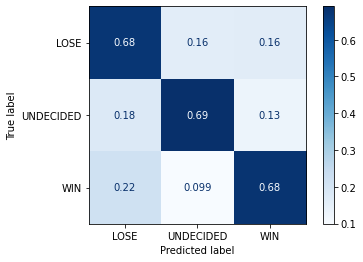

In [177]:
acc = accuracy_score(y_test, y_pred)
print('accuracy: ', acc)

plot_confusion_matrix(
    pipe, 
    X_test, 
    y_test,
    cmap=plt.cm.Blues,
    normalize='true',
)
plt.show()

In [178]:
dummy_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('clf', DummyClassifier()),
])

dummy_pipe.fit(X_train, y_train)
dummy_pred = dummy_pipe.predict(X_test)

dummy_acc = accuracy_score(y_test, dummy_pred)
print(dummy_acc)

0.3635480738102946


/Users/jz/Desktop/Dev/Python/legalist/legal_env/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
# data_stripped.to_csv('out.csv', index=False)